# Car Pricing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
car = pd.read_csv("data/car.csv")

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
car.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
car.isnull().sum()*100/car.shape[0]

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [6]:
car["Year"] = np.abs(2020- car.Year)

In [7]:
df = pd.get_dummies(car.Transmission)
car["Automatic"] = df.Automatic
car["Manual"] = df.Manual
car

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Automatic,Manual
0,0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1
2,2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1
3,3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,0,1
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,0,1
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,0,1
6017,6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,0,1


In [8]:
car.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [9]:
lst = []
for i in range(car.shape[0]):
    if car.Owner_Type.iloc[i] == "First":
        lst.append(1)
    elif car.Owner_Type.iloc[i] == "Second":
        lst.append(2)
    elif car.Owner_Type.iloc[i] == "Third":
        lst.append(3)
    else:
        lst.append(4)
car["OwnerType"] = lst  

In [10]:
car

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Automatic,Manual,OwnerType
0,0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0,1,1
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0,1,1
2,2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,1
3,3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0,1,1
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,0,1,1
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,0,1,1
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,0,1,2
6017,6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,0,1,1


In [11]:
df = pd.get_dummies(car.Fuel_Type)
car["is_CNG"] = df.CNG
car["is_Diesel"] = df.Diesel
car["is_Petrol"] = df.Petrol
car["is_LPG"] = df.LPG
car["is_Electric"] = df.Electric
car

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,New_Price,Price,Automatic,Manual,OwnerType,is_CNG,is_Diesel,is_Petrol,is_LPG,is_Electric
0,0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,NaN,1.75,0,1,1,1,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,NaN,12.50,0,1,1,0,1,0,0,0
2,2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,8.61 Lakh,4.50,0,1,1,0,0,1,0,0
3,3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,NaN,6.00,0,1,1,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,NaN,17.74,1,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,7.88 Lakh,4.75,0,1,1,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,NaN,4.00,0,1,1,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,NaN,2.90,0,1,2,0,1,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,NaN,2.65,0,1,1,0,0,1,0,0


In [12]:
def split(df):
    lst = []
    for x in range(df.shape[0]):
        txt = df.iloc[x]
        number = txt.split(" ")
        lst.append(number[0])
    return lst

In [13]:
del car["New_Price"]

In [14]:
car.dropna(inplace=True)
car.isnull().sum()*100/car.shape[0]
car

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Seats,Price,Automatic,Manual,OwnerType,is_CNG,is_Diesel,is_Petrol,is_LPG,is_Electric
0,0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,5.0,1.75,0,1,1,1,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,5.0,12.50,0,1,1,0,1,0,0,0
2,2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,5.0,4.50,0,1,1,0,0,1,0,0
3,3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,7.0,6.00,0,1,1,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,5.0,17.74,1,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,5.0,4.75,0,1,1,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,5.0,4.00,0,1,1,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,8.0,2.90,0,1,2,0,1,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,5.0,2.65,0,1,1,0,0,1,0,0


In [15]:
car["Engine"] = split(car.Engine)
car["Mileage"] = split(car.Mileage)
car["Power"] = split(car.Power)

In [16]:
car.Engine = car.Engine.astype('float64')

In [17]:
car.Mileage = car.Mileage.astype('float64')

In [18]:
for x in range(car.shape[0]):
    if car.Power.iloc[x] == "null":
        car.Power.iloc[x] = None
car.dropna(inplace = True)

In [19]:
car.Power = car.Power.astype('float64')

In [20]:
car

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Seats,Price,Automatic,Manual,OwnerType,is_CNG,is_Diesel,is_Petrol,is_LPG,is_Electric
0,0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,...,5.0,1.75,0,1,1,1,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,...,5.0,12.50,0,1,1,0,1,0,0,0
2,2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,...,5.0,4.50,0,1,1,0,0,1,0,0
3,3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,...,7.0,6.00,0,1,1,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,...,5.0,17.74,1,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.40,1248.0,...,5.0,4.75,0,1,1,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.40,1120.0,...,5.0,4.00,0,1,1,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.00,2498.0,...,8.0,2.90,0,1,2,0,1,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.90,998.0,...,5.0,2.65,0,1,1,0,0,1,0,0


In [21]:
car["brand"] = split(car.Name)

In [22]:
car.brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [23]:
df  = pd.get_dummies(car.brand)
for x in df.columns:
    car[x] = df[x]

In [24]:
car

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,...,0,0,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.40,1248.0,...,0,0,0,0,0,0,0,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.40,1120.0,...,0,0,0,0,0,0,0,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.00,2498.0,...,0,0,0,0,0,0,0,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.90,998.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5872 non-null   int64  
 1   Name               5872 non-null   object 
 2   Location           5872 non-null   object 
 3   Year               5872 non-null   int64  
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   float64
 9   Engine             5872 non-null   float64
 10  Power              5872 non-null   float64
 11  Seats              5872 non-null   float64
 12  Price              5872 non-null   float64
 13  Automatic          5872 non-null   uint8  
 14  Manual             5872 non-null   uint8  
 15  OwnerType          5872 non-null   int64  
 16  is_CNG             5872 

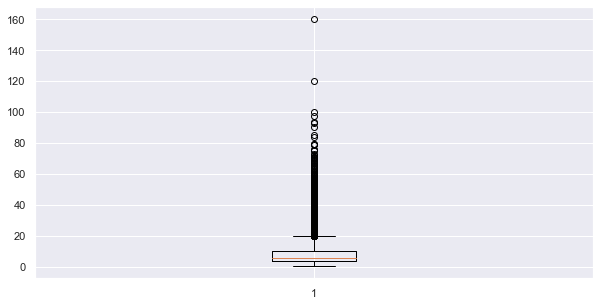

In [26]:
plt.figure(figsize=(10,5))
plt.boxplot(car.Price)
plt.show()

# X and Y

In [27]:
X = car.select_dtypes(exclude = "object")
del X["Unnamed: 0"]
X.drop(columns = ["Price"],inplace = True)
X.reset_index(inplace = True)
X.drop(columns = "index", inplace = True)
y = car.Price
y_df = pd.DataFrame(y)
y_df.reset_index(inplace = True)
y_df.drop(columns = "index", inplace=True)

# X Custom

In [160]:
best_cols = car.corr().Price[abs(car.corr().Price)> 0.30].index
best_cols

Index(['Year', 'Mileage', 'Engine', 'Power', 'Price', 'Automatic', 'Manual',
       'is_Diesel', 'is_Petrol', 'BMW', 'Mercedes-Benz'],
      dtype='object')

In [29]:
X_custom = car[best_cols]
X_custom.reset_index(inplace = True)
X_custom.drop(columns = "index", inplace = True)
X_custom.drop(columns = "Price",inplace=True)

In [30]:
# Extracting a outlier

In [31]:
from scipy.stats import zscore
z = zscore(car.Price)

for threshold in range(1,5):
    print("Threshold value {}:".format(threshold))
    print("Number of outliers {}:".format(len(np.where(z>threshold))))

Threshold value 1:
Number of outliers 1:
Threshold value 2:
Number of outliers 1:
Threshold value 3:
Number of outliers 1:
Threshold value 4:
Number of outliers 1:


In [32]:
bound = 140
car.drop(car[car.Price>bound].index,inplace=True)
car

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,Maruti Wagon R LXI CNG,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,...,0,0,0,0,0,0,0,0,0,0
2,2,Honda Jazz V,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Maruti Ertiga VDI,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,...,0,0,0,0,0,0,0,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,6,27365,Diesel,Manual,First,28.40,1248.0,...,0,0,0,0,0,0,0,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,5,100000,Diesel,Manual,First,24.40,1120.0,...,0,0,0,0,0,0,0,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,8,55000,Diesel,Manual,Second,14.00,2498.0,...,0,0,0,0,0,0,0,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,7,46000,Petrol,Manual,First,18.90,998.0,...,0,0,0,0,0,0,0,0,0,0


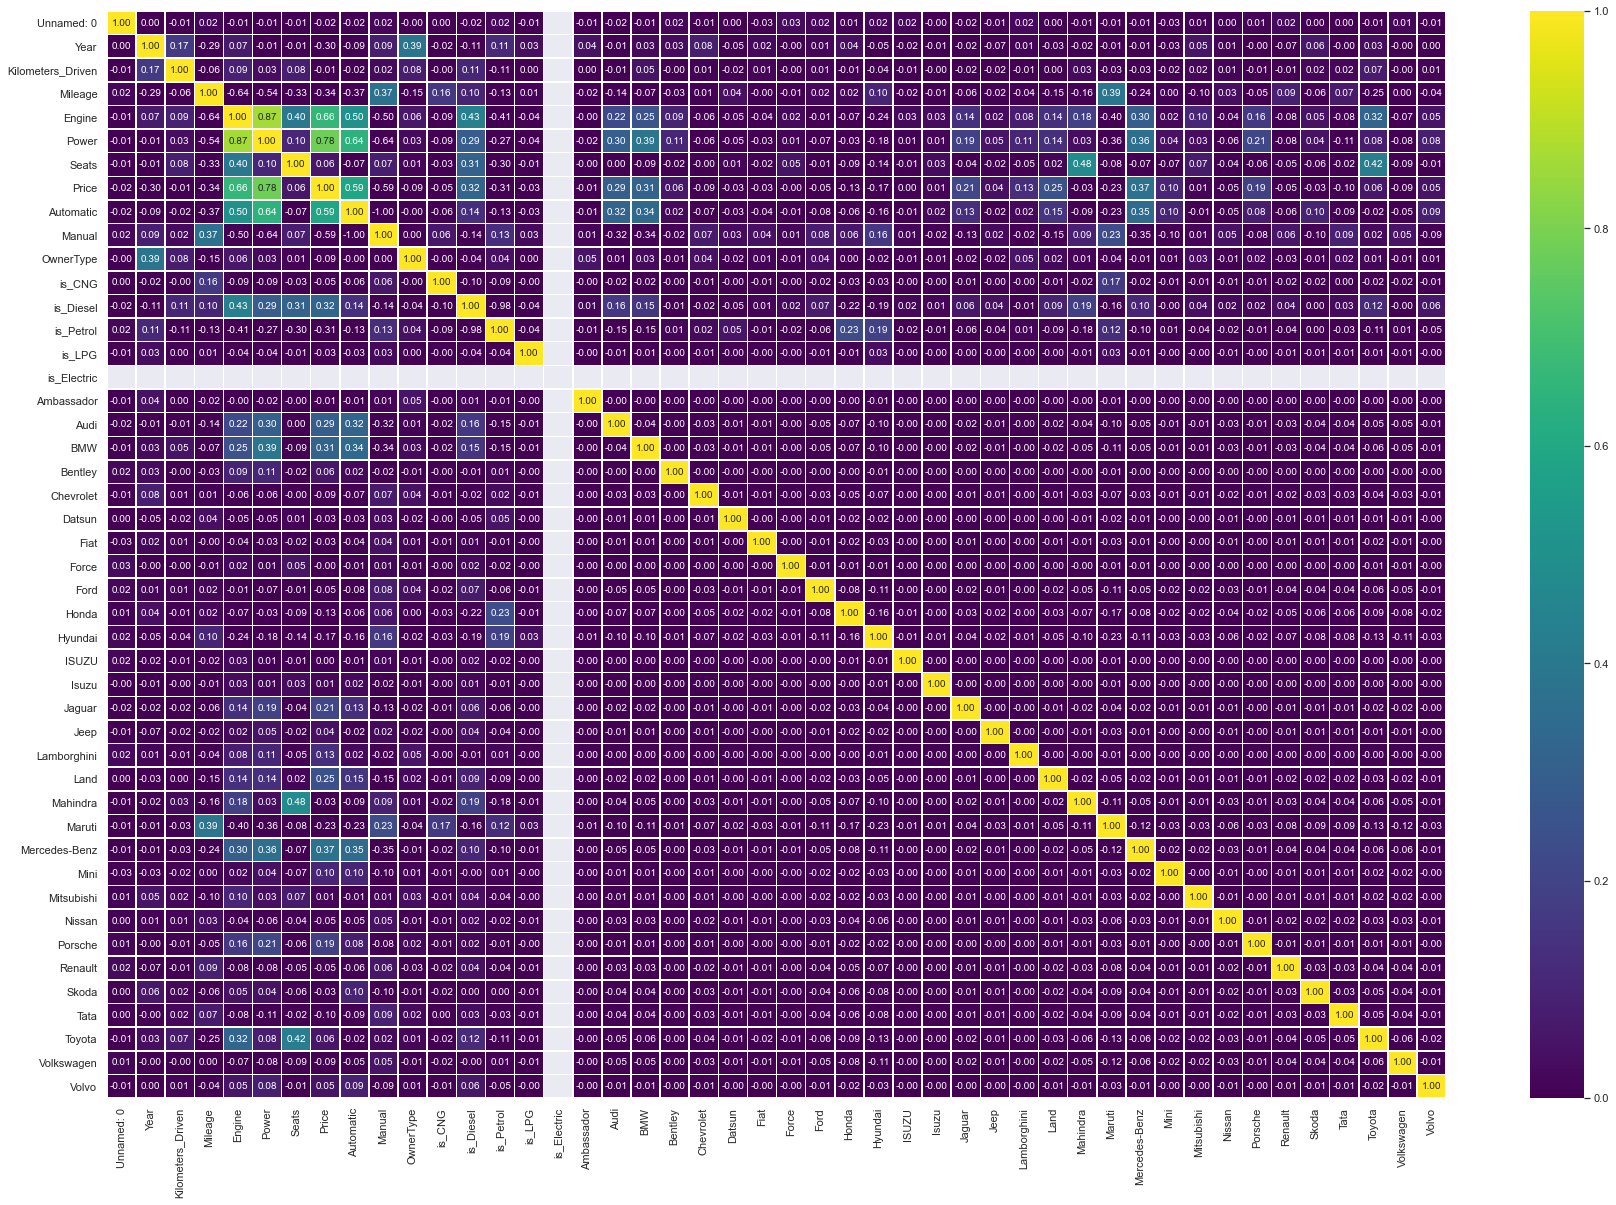

In [33]:
corr = car.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, linewidth=.5, annot=True, fmt=".2f", annot_kws={"size":10}, cmap="viridis", vmin =0, vmax=1)

* **Year**

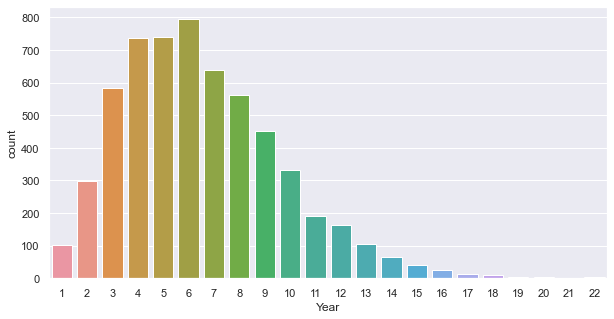

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(car.Year)
plt.show()

* **Kilometers Driven**

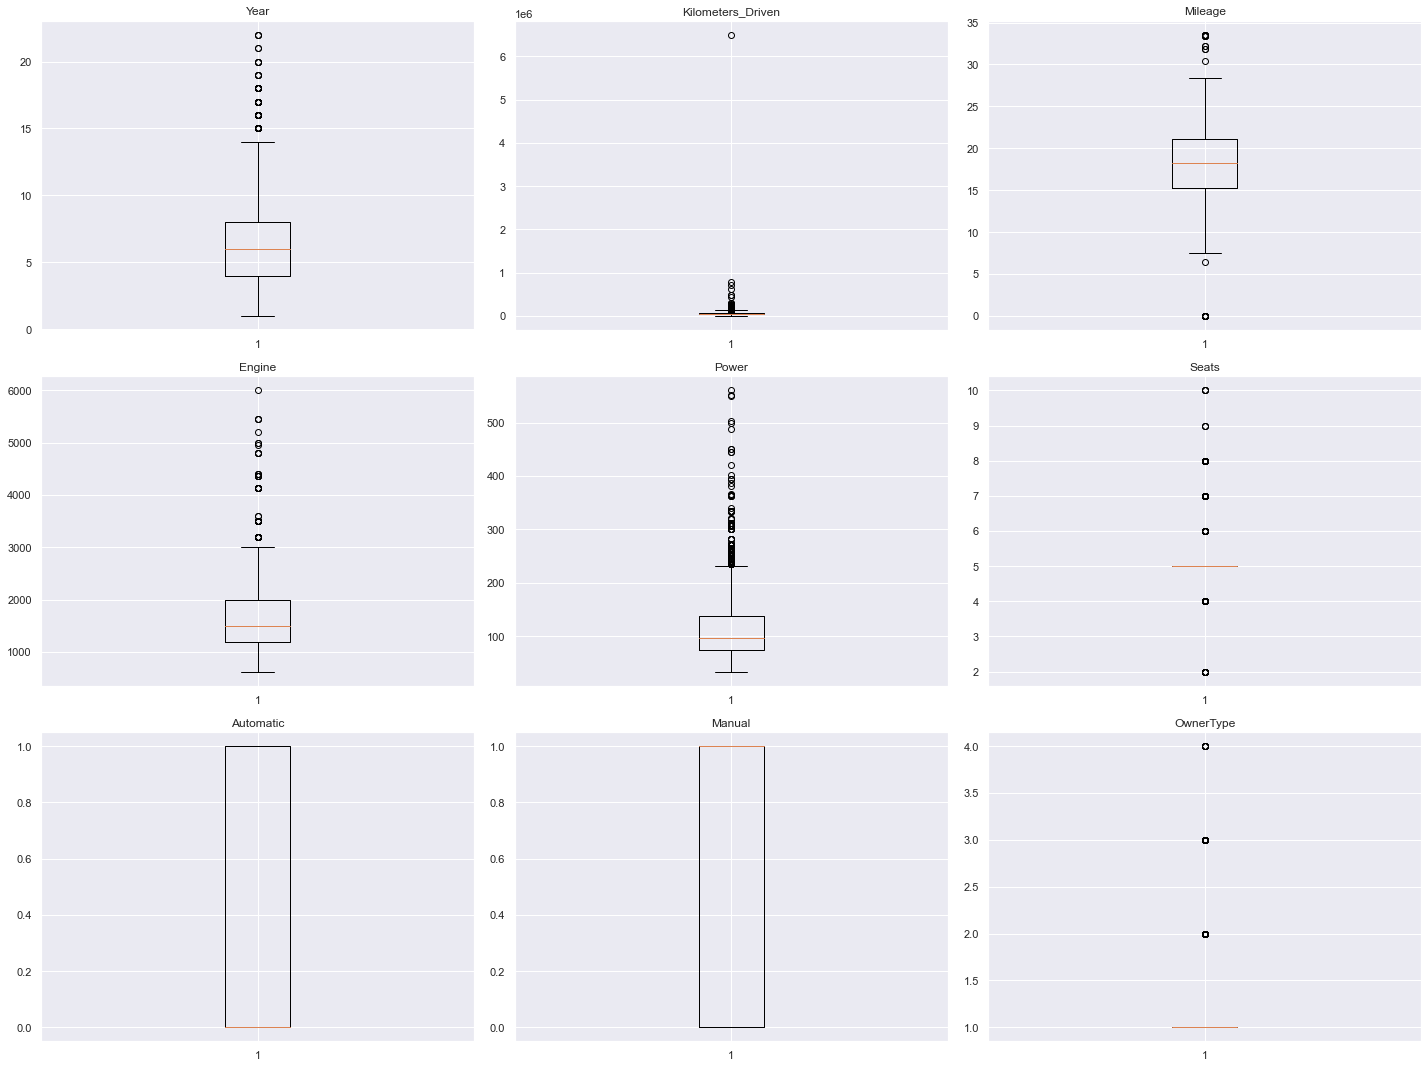

In [35]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(20,15))

for i,j in zip(X.columns[:12],[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]):
    j.boxplot(car[i])
    j.set_title(i)
plt.tight_layout()
plt.show()

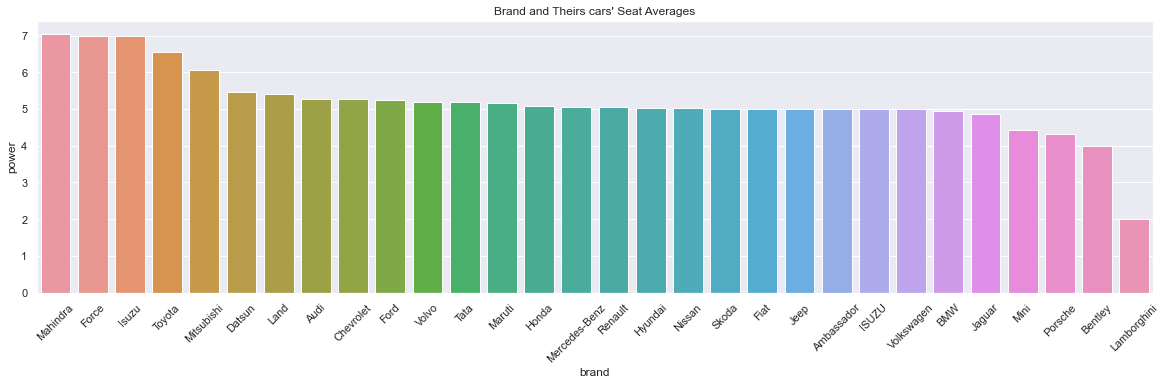

In [36]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append(car.groupby(i).Seats.mean()[1])

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' Seat Averages")
plt.xticks(rotation = 45)
plt.show()

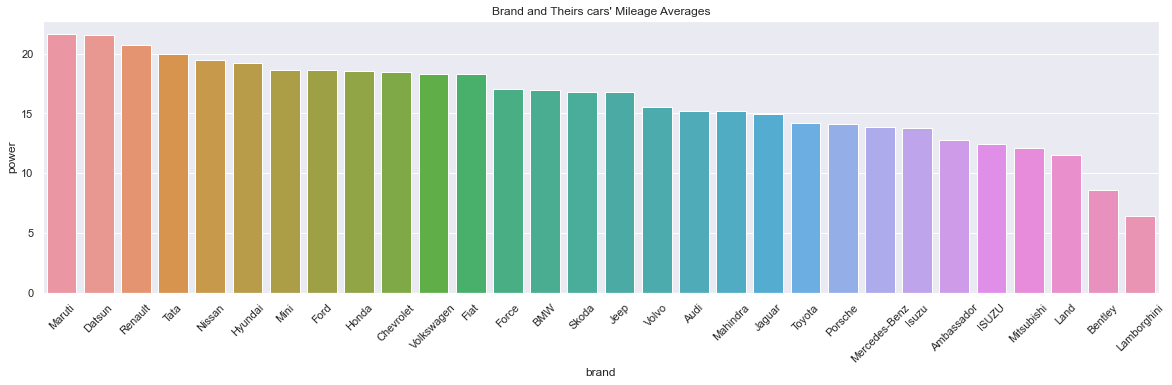

In [37]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append(car.groupby(i).Mileage.mean()[1])

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' Mileage Averages")
plt.xticks(rotation = 45)
plt.show()

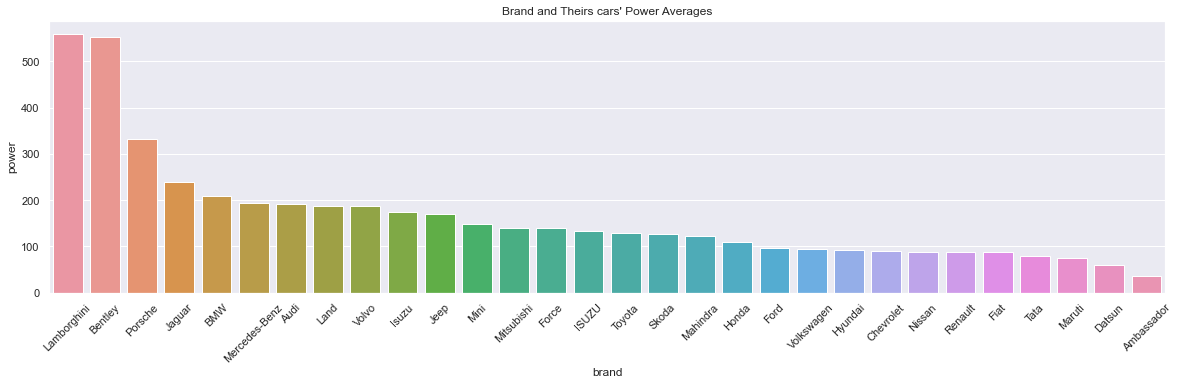

In [38]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append(car.groupby(i).Power.mean()[1])

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' Power Averages")
plt.xticks(rotation = 45)
plt.show()

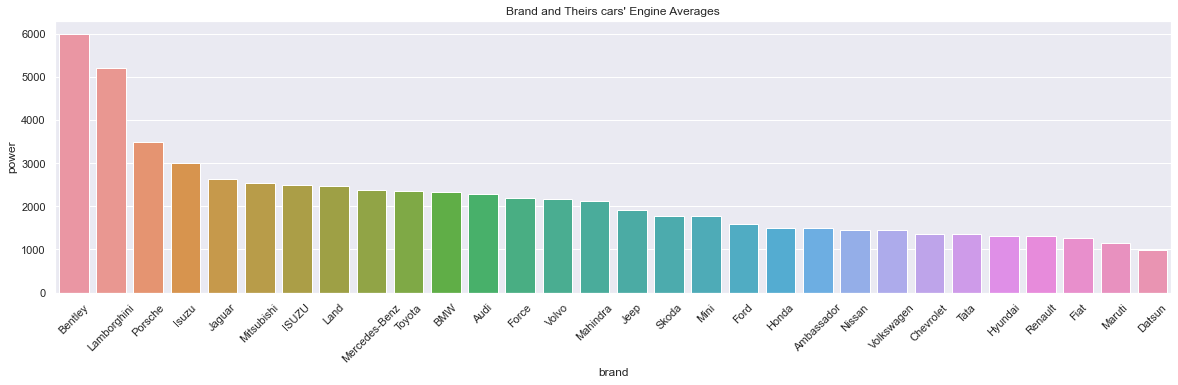

In [39]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append(car.groupby(i).Engine.mean()[1])

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' Engine Averages")
plt.xticks(rotation = 45)
plt.show()

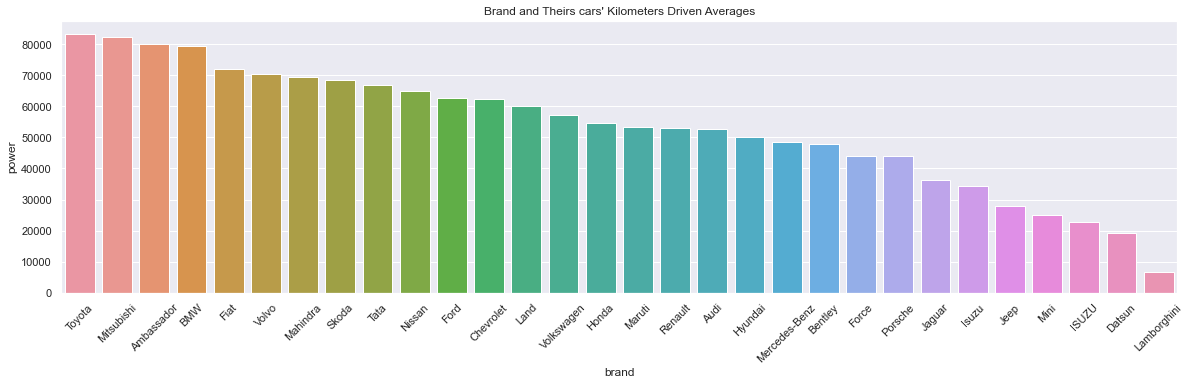

In [40]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append(car.groupby(i).Kilometers_Driven.mean()[1])

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' Kilometers Driven Averages")
plt.xticks(rotation = 45)
plt.show()

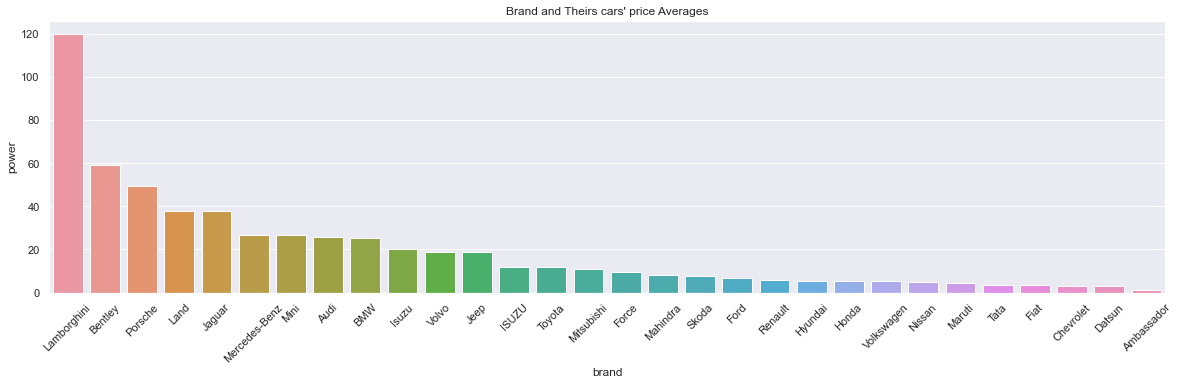

In [41]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append(car.groupby(i).Price.mean()[1])

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' price Averages")
plt.xticks(rotation = 45)
plt.show()

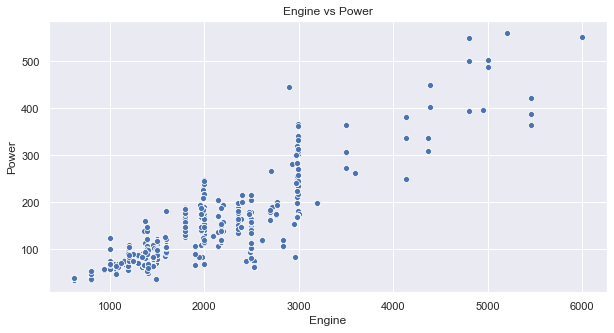

In [42]:
plt.figure(figsize = (10,5))
plt.title("Engine vs Power")
sns.scatterplot(x=car.Engine, y= car.Power, palette = "rocket_r")
plt.show()

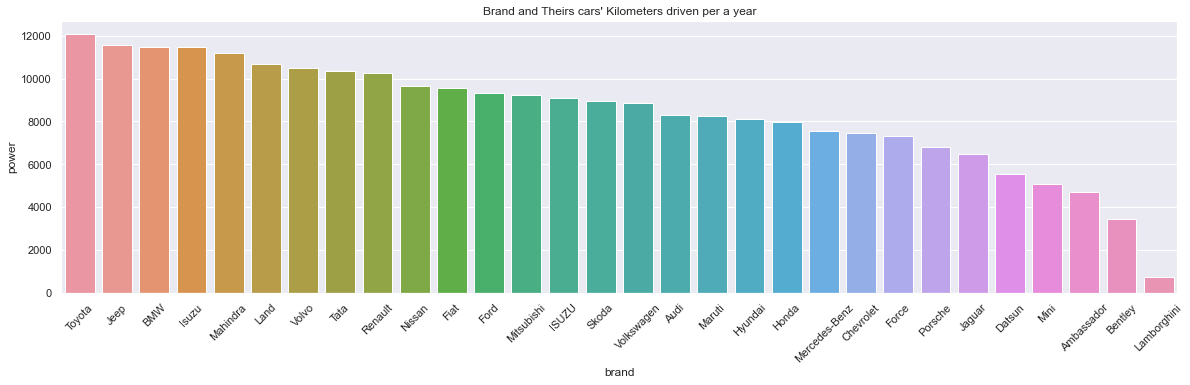

In [43]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append((car.groupby(i).Kilometers_Driven.sum()[1])/(car.groupby(i).Year.sum()[1]))

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' Kilometers driven per a year")
plt.xticks(rotation = 45)
plt.show()

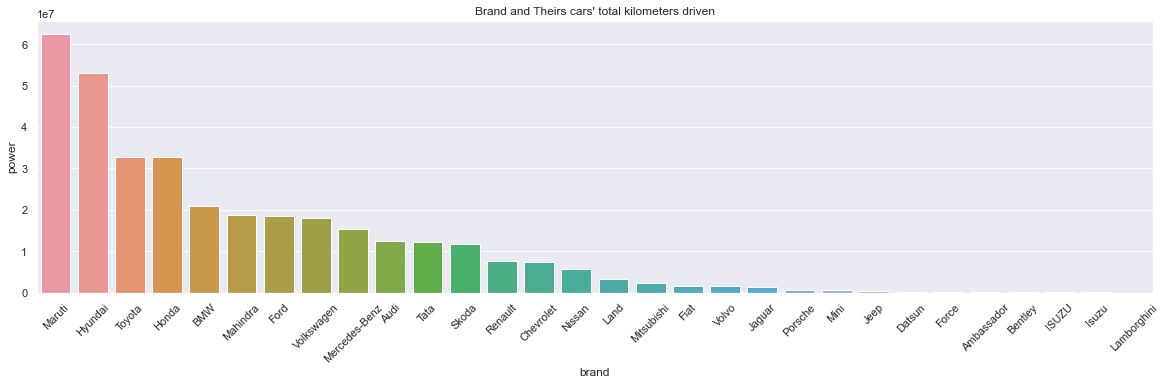

In [44]:
lst_name = []
lst = []
for i in car.brand.unique():
    lst_name.append(i)
    lst.append((car.groupby(i).Kilometers_Driven.sum()[1]))

df = pd.DataFrame()
df["brand"] = lst_name
df["power"] = lst

df = df.sort_values("power",ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(x = df.brand, y=df.power)
plt.title("Brand and Theirs cars' total kilometers driven")
plt.xticks(rotation = 45)
plt.show()

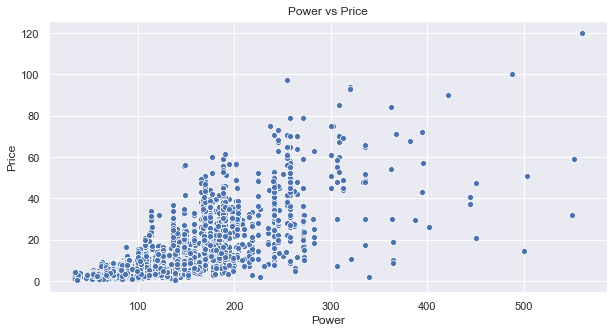

In [45]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=car.Power,y=car.Price)
plt.title("Power vs Price")
plt.show()

# X_PCA

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_Sta = StandardScaler().fit_transform(X)
pca = PCA(n_components=27)
principal_components = pca.fit_transform(X_Sta)

exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.10604753 0.05661721 0.04647427 0.03348735 0.03009916 0.02701035
 0.02553573 0.02530027 0.02509233 0.02453616 0.02435283 0.02422756
 0.02409083 0.02394348 0.02382639 0.02375698 0.02366267 0.02357265
 0.0234526  0.02341075 0.02339818 0.02336343 0.02335558 0.02333759
 0.0232937  0.0232873  0.02327742]
[10.6  16.26 20.91 24.26 27.27 29.97 32.52 35.05 37.56 40.01 42.45 44.87
 47.28 49.67 52.05 54.43 56.8  59.16 61.51 63.85 66.19 68.53 70.87 73.2
 75.53 77.86 80.19]


In [47]:
pca = PCA(n_components=27)
principal_components = pca.fit_transform(X_Sta)
X_pca  = pd.DataFrame(principal_components)
X_pca

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-3.057789,-0.687947,-2.118603,2.392550,5.387286,1.858128,1.302711,1.078269,0.141222,0.031279,...,-0.116605,-0.084173,0.064267,0.201736,-0.093140,0.028838,-0.005278,0.040568,-0.158500,0.034524
1,-0.428198,-0.760508,-0.829852,-0.647953,-1.614995,1.389467,0.576227,-0.023274,-0.040809,0.015111,...,-0.078583,0.025710,-0.039788,0.026994,-0.039901,0.007029,-0.001032,-0.019198,-0.001531,0.000602
2,-1.629740,1.275933,1.348564,-0.477485,0.210185,-1.978703,0.756212,-0.874005,-0.567923,-0.163791,...,-0.344506,0.171019,-0.144625,0.005569,-0.149205,0.077433,-0.047343,-0.052964,0.039982,0.023637
3,-0.849739,-2.192503,-0.427720,0.436783,1.519540,0.306167,-0.090720,-0.084984,-0.035760,0.124985,...,-0.057659,0.001830,0.007054,-0.009525,0.031726,-0.002992,0.025033,0.002374,0.021742,-0.013461
4,3.020702,0.691394,-0.715037,1.291214,0.019321,0.535656,-1.624815,-0.953988,-1.579354,-1.049294,...,0.255569,-0.728900,-0.001840,-0.026857,0.103700,0.200644,0.031273,0.089846,-0.119678,0.041868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,-1.816633,-1.299318,-2.196566,0.717627,1.074257,0.082859,0.180514,0.155098,-0.066679,0.047535,...,-0.025164,0.027463,-0.030075,-0.029456,-0.015650,0.000676,-0.005961,-0.014200,0.028781,0.003842
5868,-1.461289,-0.979085,-1.336070,-0.277791,-1.660092,1.397098,0.467542,-0.400545,0.087134,-0.025632,...,-0.072921,0.034099,-0.043999,0.059073,-0.039368,-0.015184,-0.010728,-0.030313,-0.025583,-0.007152
5869,1.654823,-4.003752,2.636958,-0.586280,0.558350,0.330155,-0.267785,-0.416781,-2.899709,1.702988,...,0.679818,0.182743,-0.246197,0.270592,0.156047,0.108425,-0.152263,0.157577,-0.281568,0.022411
5870,-2.307278,0.665764,0.053521,0.042094,1.575523,0.186412,-0.126294,0.214485,0.069759,0.098072,...,-0.002795,-0.065728,0.039521,-0.028887,0.038970,-0.018296,0.003962,0.019016,-0.012731,0.002320


# Polynamial Function X_pf_df

In [178]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_pf_df = pd.DataFrame(X_poly, columns = poly.get_feature_names(X.columns))
X_pf_df.drop(columns = "1", inplace=True)
X_pf_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Automatic,Manual,OwnerType,is_CNG,...,Tata^2,Tata Toyota,Tata Volkswagen,Tata Volvo,Toyota^2,Toyota Volkswagen,Toyota Volvo,Volkswagen^2,Volkswagen Volvo,Volvo^2
0,10.0,72000.0,26.60,998.0,58.16,5.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,41000.0,19.67,1582.0,126.20,5.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,46000.0,18.20,1199.0,88.70,5.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,87000.0,20.77,1248.0,88.76,7.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,40670.0,15.20,1968.0,140.80,5.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,6.0,27365.0,28.40,1248.0,74.00,5.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5868,5.0,100000.0,24.40,1120.0,71.00,5.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5869,8.0,55000.0,14.00,2498.0,112.00,8.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5870,7.0,46000.0,18.90,998.0,67.10,5.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
dummy = X_pf_df.copy()
dummy["target"] = y_df
pd.DataFrame(dummy.corr().target).sort_values(by="target",ascending=False)[1:20]

,target
Power,0.772843
Power Automatic,0.742957
Power^2,0.736489
Engine Power,0.733789
Engine Automatic,0.706348
Power Seats,0.697550
Mileage Power,0.658558
Engine,0.658047
Engine^2,0.652020
Automatic is_Diesel,0.642638


In [50]:
X_Sta = StandardScaler().fit_transform(X_pf_df)
pca = PCA(n_components=35)
principal_components = pca.fit_transform(X_Sta)

exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.067158   0.04314872 0.03190278 0.02765268 0.02514989 0.02472921
 0.02412345 0.02358045 0.02353146 0.02348238 0.02345323 0.02343795
 0.02336227 0.02322084 0.02318172 0.0230285  0.02295405 0.02290273
 0.02286299 0.0227627  0.02269145 0.02264585 0.02258814 0.02253588
 0.02251221 0.02244143 0.02241271 0.0224062  0.02232975 0.02221638
 0.0206804  0.01973013 0.0188839  0.01549566 0.00992767]
[ 6.72 11.03 14.22 16.99 19.5  21.97 24.38 26.74 29.09 31.44 33.79 36.13
 38.47 40.79 43.11 45.41 47.71 50.   52.29 54.57 56.84 59.1  61.36 63.61
 65.86 68.1  70.34 72.58 74.81 77.03 79.1  81.07 82.96 84.51 85.5 ]


# X_pf_pca

In [51]:
pca = PCA(n_components=35)
principal_components = pca.fit_transform(X_Sta)
X_pf_pca  = pd.DataFrame(principal_components)
X_pf_pca

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-7.421708,2.527746,-13.741822,17.052512,6.420223,-3.201112,-0.186699,-0.090661,0.058743,-0.482389,...,-0.819880,-0.581478,-0.385759,-0.193154,1.333357,25.008584,3.285292,-6.343432,-0.939541,0.343960
1,-1.287440,2.350919,-0.789210,-5.649753,4.311479,-0.016804,0.350472,-0.161306,0.773561,-0.390942,...,0.025959,-0.280036,0.141900,0.385399,0.334967,1.144133,-1.078391,3.241466,-0.898050,0.120211
2,-4.577404,-4.367445,4.338569,1.274494,-4.974407,-1.381239,-0.773065,-1.493564,2.866163,-0.850169,...,-0.515290,0.468920,-0.156013,0.373130,0.020228,1.874796,-1.133122,2.376941,-0.486507,1.281720
3,-2.803252,4.917919,-3.839037,4.385188,0.722798,-0.374612,-0.227193,-0.072846,0.225067,0.000003,...,0.227664,-0.504100,0.270347,0.323402,0.177015,-3.575580,0.014484,2.931051,-1.280432,-0.556308
4,9.876442,-1.112372,-3.131900,-0.411308,-0.076239,1.005038,-2.589430,-3.288272,4.207076,-1.367581,...,1.300102,0.355030,0.599770,-1.622241,0.068538,-0.184770,2.916777,-0.148367,-2.599811,-0.604030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,-3.267949,3.847064,-5.805194,2.868199,0.088803,-0.451933,0.468878,-0.086676,0.299812,-0.000784,...,0.260691,-0.310456,0.226193,0.284481,0.076969,-2.970466,-1.597643,3.400520,-0.913456,-0.792301
5868,-2.771418,2.739539,-1.434365,-5.524549,4.316365,0.907647,0.095191,-0.056801,0.858842,-0.586585,...,-0.011282,-0.216281,0.122916,0.592577,0.324080,1.108256,-0.221878,4.072902,-0.333875,-0.903271
5869,2.403130,10.964037,5.956821,0.458434,0.373323,-6.048750,0.023024,-4.547073,4.770569,0.622281,...,0.625995,-0.613772,0.080440,0.551737,-0.527729,-0.577636,2.478971,-4.543345,-1.501769,-1.744832
5870,-5.795544,-2.245404,-2.388280,3.752903,0.528628,-0.952893,-0.388535,0.016327,-0.315538,0.268034,...,0.192694,-0.662823,0.219983,0.047532,0.117372,-3.758851,0.462760,-0.663442,0.483069,1.138803


# X_custom_pf

In [52]:
dum = X_pf_df.copy()
dum["target"] = y_df.copy()

In [177]:
best_cols = dum.corr().target[abs(dum.corr().target)> 0.1].index
X_custom_pf = dum[best_cols]
X_custom_pf.reset_index(inplace = True)
X_custom_pf.drop(columns = "index", inplace = True)
X_custom_pf.drop(columns = "target",inplace=True)
X_custom_pf

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Automatic,Manual,OwnerType,Year^2,...,Power^2,Power Seats,Power Automatic,Seats^2,Seats Manual,Seats OwnerType,Automatic^2,Automatic OwnerType,Manual^2,OwnerType^2
0,26.60,998.0,58.16,0.0,1.0,0.0,0.0,0.0,0.0,707.5600,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.67,1582.0,126.20,0.0,1.0,1.0,0.0,0.0,0.0,386.9089,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.20,1199.0,88.70,0.0,1.0,0.0,1.0,0.0,0.0,331.2400,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20.77,1248.0,88.76,0.0,1.0,1.0,0.0,0.0,0.0,431.3929,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.20,1968.0,140.80,1.0,0.0,1.0,0.0,0.0,0.0,231.0400,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,28.40,1248.0,74.00,0.0,1.0,1.0,0.0,0.0,0.0,806.5600,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5868,24.40,1120.0,71.00,0.0,1.0,1.0,0.0,0.0,0.0,595.3600,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5869,14.00,2498.0,112.00,0.0,1.0,1.0,0.0,0.0,0.0,196.0000,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5870,18.90,998.0,67.10,0.0,1.0,0.0,1.0,0.0,0.0,357.2100,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# X CustomPF

In [54]:
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_custom)
X_custompf = pd.DataFrame(X_poly, columns = poly.get_feature_names(X_custom.columns))
X_custompf.drop(columns = "1", inplace=True)
X_custompf

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Automatic,Manual,OwnerType,Year^2,...,Seats^2,Seats Automatic,Seats Manual,Seats OwnerType,Automatic^2,Automatic Manual,Automatic OwnerType,Manual^2,Manual OwnerType,OwnerType^2
0,26.60,998.0,58.16,0.0,1.0,0.0,0.0,0.0,0.0,707.5600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.67,1582.0,126.20,0.0,1.0,1.0,0.0,0.0,0.0,386.9089,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.20,1199.0,88.70,0.0,1.0,0.0,1.0,0.0,0.0,331.2400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,20.77,1248.0,88.76,0.0,1.0,1.0,0.0,0.0,0.0,431.3929,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.20,1968.0,140.80,1.0,0.0,1.0,0.0,0.0,0.0,231.0400,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,28.40,1248.0,74.00,0.0,1.0,1.0,0.0,0.0,0.0,806.5600,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5868,24.40,1120.0,71.00,0.0,1.0,1.0,0.0,0.0,0.0,595.3600,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5869,14.00,2498.0,112.00,0.0,1.0,1.0,0.0,0.0,0.0,196.0000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5870,18.90,998.0,67.10,0.0,1.0,0.0,1.0,0.0,0.0,357.2100,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
dum = X_custompf.copy()
dum["target"] = y_df.copy()

In [56]:
best_cols = dum.corr().target[abs(dum.corr().target)> 0.3].index
X_custom2_pf = dum[best_cols]
X_custom2_pf.reset_index(inplace = True)
X_custom2_pf.drop(columns = "index", inplace = True)
X_custom2_pf.drop(columns = "target",inplace=True)
X_custom2_pf

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Automatic,Manual,OwnerType,Year^2,...,Engine Seats,Engine Manual,Engine OwnerType,Power^2,Power Automatic,Seats^2,Seats OwnerType,Automatic^2,Manual^2,OwnerType^2
0,26.60,998.0,58.16,0.0,1.0,0.0,0.0,0.0,0.0,707.5600,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.67,1582.0,126.20,0.0,1.0,1.0,0.0,0.0,0.0,386.9089,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,18.20,1199.0,88.70,0.0,1.0,0.0,1.0,0.0,0.0,331.2400,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,20.77,1248.0,88.76,0.0,1.0,1.0,0.0,0.0,0.0,431.3929,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,15.20,1968.0,140.80,1.0,0.0,1.0,0.0,0.0,0.0,231.0400,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,28.40,1248.0,74.00,0.0,1.0,1.0,0.0,0.0,0.0,806.5600,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5868,24.40,1120.0,71.00,0.0,1.0,1.0,0.0,0.0,0.0,595.3600,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5869,14.00,2498.0,112.00,0.0,1.0,1.0,0.0,0.0,0.0,196.0000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5870,18.90,998.0,67.10,0.0,1.0,0.0,1.0,0.0,0.0,357.2100,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
# Yorum

# Linear Regression

In [58]:
y_df = pd.DataFrame(y)
y_df.reset_index(inplace = True)
y_df.drop(columns = "index", inplace=True)
y_df

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
...,...
5867,4.75
5868,4.00
5869,2.90
5870,2.65


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lrm = LinearRegression()
lrm.fit(X_custom_pf,y_df)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [[ 5.45396567e+05  1.34948924e+00  1.35335285e-02 -2.26955781e-03
   6.08244615e-01 -6.08225151e-01 -2.81665154e-01  5.96462791e+00
   1.19823468e+01  4.86264765e+00  4.48248870e+00  7.90143404e+00
   4.57302978e+01  6.63434314e-07  1.48736516e+01  4.05303638e-01
   5.46626478e+00  6.28207345e+00  1.42794187e+01  3.61824138e-02
   1.88481616e-06  2.71137306e-02 -1.26844420e-02 -2.30000034e-02
  -5.45396903e+05 -5.45396885e+05 -7.56319910e-02 -1.04792936e-01
   9.40842676e-02 -1.08447005e+00 -1.44414158e+00 -2.35225984e-02
  -1.29473574e-01 -1.28144801e+00  6.24634184e-06 -1.98065590e+00
  -2.33317231e-01 -8.56786153e-01  4.84748572e+00  1.14063265e-07
  -3.33729376e-05 -2.38930385e-05 -2.17521933e-06 -7.26653782e-05
  -2.74581757e-06 -9.45695206e-07 -1.32996681e-04  4.56952971e-03
  -2.25747905e-04  3.37144475e-06 -9.43381650e-05 -3.19262842e-04
  -1.81482759e-02 -5.65908779e-04  5.87539618e-03 -1.52909427e-01
   7.09410775e-01  6.41180698e-01 -8.10556585e-02 -6.961130

* **OLS with X**

In [61]:
import statsmodels.api as sm

X_cnst_normal = sm.add_constant(X)
result_normal = sm.OLS(y_df, X_cnst_normal).fit()

result_normal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     488.4
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:04:48   Log-Likelihood:                -18227.
No. Observations:                5872   AIC:                         3.654e+04
Df Residuals:                    5831   BIC:                         3.681e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3185      0.770      8.205      0.000       4.809       7.828
Year                 -1.0701      0.027    -39.129      0.000      -1.124      -1.017
Kilometers_Driven  2.277e-06   7.88e-07      2.889      0.004    7.32e-07    3.82e-06
Mileage              -0.1143      0.030     -3.753      0.000      -0.174      -0.055
Engine                0.0020      0.000      4.989      0.000       0.001       0.003
Power                 0.0809      0.004     19.403      0.000       0.073       0.089
Seats                 0.0228      0.140      0.163      0.870      -0.251       0.296
Automatic             3.1610      0.401      7.892      0.000       2.376       3.946
Manual                3.1575      0.404      7.810      0.000       2.365       3.950
OwnerType            -0.2155      0.173     -1.246      0.213      -0.555       0.124
is_CNG                0.7433      0.732      1.016      0.310      -0.691       2.178
is_Diesel             1.4712      0.479      3.072      0.002       0.532       2.410
is_Petrol             0.5203      0.432      1.204      0.229      -0.327       1.367
is_LPG                3.5837      1.363      2.630      0.009       0.912       6.255
is_Electric        9.922e-15   4.93e-15      2.011      0.044     2.5e-16    1.96e-14
Ambassador            4.5618      5.268      0.866      0.387      -5.766      14.890
Audi                  3.1873      0.556      5.733      0.000       2.097       4.277
BMW                   2.2956      0.557      4.122      0.000       1.204       3.387
Bentley               8.3580      5.354      1.561      0.119      -2.138      18.854
Chevrolet            -6.3393      0.657     -9.655      0.000      -7.626      -5.052
Datsun               -7.5222      1.540     -4.884      0.000     -10.541      -4.503
Fiat                 -6.4572      1.181     -5.467      0.000      -8.773      -4.142
Force                -8.8997      3.060     -2.908      0.004     -14.898      -2.901
Ford                 -5.3622      0.534    -10.046      0.000      -6.409      -4.316
Honda                -7.0434      0.488    -14.419      0.000      -8.001      -6.086
Hyundai              -6.0599      0.475    -12.763      0.000      -6.991      -5.129
ISUZU               -10.5898      3.736     -2.834      0.005     -17.914      -3.265
Isuzu                -6.2954      5.258     -1.197      0.231     -16.604       4.013
Jaguar                9.9478      0.949     10.479      0.000       8.087      11.809
Jeep                 -5.1669      1.424     -3.628      0.000      -7.959      -2.375
Lamborghini          65.2670      5.364     12.167      0.000      54.751      75.783
Land                 15.9369      0.825     19.316      0.000      14.319      17.554
Mahindra             -8.6240      0.587    -14.683      0.000      -9.775

* **X_custom with OLS**

In [62]:
X_cnst_normal = sm.add_constant(X_custom)
result_normal = sm.OLS(y_df, X_cnst_normal).fit()

result_normal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1265.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:04:48   Log-Likelihood:                -19599.
No. Observations:                5872   AIC:                         3.922e+04
Df Residuals:                    5863   BIC:                         3.928e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.2375      0.897     -5.842      0.000      -6.995      -3.480
Mileage           0.1799      0.033      5.496      0.000       0.116       0.244
Engine           -0.0007      0.000     -1.672      0.095      -0.001       0.000
Power             0.1453      0.004     35.180      0.000       0.137       0.153
Automatic        -0.8716      0.476     -1.830      0.067      -1.805       0.062
Manual           -4.3659      0.459     -9.507      0.000      -5.266      -3.466
is_Diesel         0.3879      0.865      0.448      0.654      -1.308       2.084
is_Petrol        -1.8989      0.877     -2.166      0.030      -3.618      -0.180
BMW              -0.5405      0.499     -1.083      0.279      -1.519       0.438
Mercedes-Benz     4.3896      0.443      9.906      0.000       3.521       5.258
==============================================================================
Omnibus:                     3885.628   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261139.510
Skew:                           2.446   Prob(JB):                         0.00
Kurtosis:                      35.302   Cond. No.                     6.14e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.71e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* **X_pf_df in OLS** 

In [63]:
X_cnst_custom = sm.add_constant(X_pf_df)
result_custom = sm.OLS(y_df,X_cnst_custom).fit()

result_custom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     415.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:04:51   Log-Likelihood:                -14732.
No. Observations:                5872   AIC:                         2.983e+04
Df Residuals:                    5689   BIC:                         3.105e+04
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -12.9666      3.011     -4.306      0.000     -18.870      -7.064
Year                               -0.2897      0.311     -0.932      0.351      -0.899       0.320
Kilometers_Driven                  -0.0006      0.001     -1.209      0.227      -0.002       0.000
Mileage                             0.9391      0.275      3.421      0.001       0.401       1.477
Engine                              0.0127      0.013      0.986      0.324      -0.013       0.038
Power                               0.0651      0.206      0.316      0.752      -0.338       0.468
Seats                               1.7294      2.269      0.762      0.446      -2.719       6.178
Automatic                          -4.4529      1.435     -3.104      0.002      -7.266      -1.640
Manual                             -8.5351      2.098     -4.068      0.000     -12.648      -4.422
OwnerType                           1.3148      1.671      0.787      0.431      -1.961       4.590
is_CNG                             -5.7255      2.035     -2.814      0.005      -9.714      -1.737
is_Diesel                          -7.0621      1.534     -4.603      0.000     -10.070      -4.054
is_Petrol                          -0.4603      1.501     -0.307      0.759      -3.402       2.482
is_LPG                              0.2603      2.344      0.111      0.912      -4.334       4.855
is_Electric                        -0.0003      0.000     -1.695      0.090      -0.001    4.83e-05
Ambassador                         -0.0003      0.000     -1.881      0.060      -0.001    1.45e-05
Audi                                1.1325      1.663      0.681      0.496      -2.127       4.392
BMW                                -5.2108      1.718     -3.033      0.002      -8.579      -1.843
Bentley                          3.193e-08   1.87e-08      1.709      0.088    -4.7e-09    6.86e-08
Chevrolet                          -3.6634      3.556     -1.030      0.303     -10.634       3.307
Datsun                              0.1197     29.796      0.004      0.997     -58.291      58.531
Fiat                               -0.1149      0.951     -0.121      0.904      -1.980       1.750
Force                              -0.0011      0.008     -0.133      0.894      -0.017       0.015
Ford                                0.1240      2.487      0.050      0.960      -4.751       4.999
Honda                              -2.7749      2.384     -1.164      0.244      -7.448       1.898
Hyundai                             0.8701      2.212      0.393      0.694      -3.467       5.207
ISUZU                            3.426e-06   3.34e-06      1.025      0.305   -3.13e-06    9.98e-06
Isuzu                           -8.035e-09   3.85e-09     -2.086      0.037   -1.56

* **OLS with Polynomial and PCA**

In [64]:
X_cnst_pca = sm.add_constant(X_pf_pca)
result_pca = sm.OLS(y_df, X_cnst_pca).fit()

result_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     399.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:04:52   Log-Likelihood:                -18952.
No. Observations:                5872   AIC:                         3.798e+04
Df Residuals:                    5836   BIC:                         3.822e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6039      0.080    120.232      0.000       9.447       9.761
0              1.4939      0.014    104.962      0.000       1.466       1.522
1             -0.2601      0.018    -14.651      0.000      -0.295      -0.225
2             -0.3413      0.021    -16.527      0.000      -0.382      -0.301
3             -0.0240      0.022     -1.084      0.278      -0.068       0.019
4              0.1988      0.023      8.547      0.000       0.153       0.244
5             -0.4500      0.023    -19.186      0.000      -0.496      -0.404
6              0.3229      0.024     13.598      0.000       0.276       0.369
7             -0.1165      0.024     -4.851      0.000      -0.164      -0.069
8             -0.1555      0.024     -6.469      0.000      -0.203      -0.108
9             -0.0224      0.024     -0.932      0.351      -0.070       0.025
10            -0.0565      0.024     -2.347      0.019      -0.104      -0.009
11             0.0071      0.024      0.297      0.767      -0.040       0.054
12            -0.0296      0.024     -1.227      0.220      -0.077       0.018
13             0.1769      0.024      7.307      0.000       0.129       0.224
14            -0.1625      0.024     -6.706      0.000      -0.210      -0.115
15             0.0125      0.024      0.513      0.608      -0.035       0.060
16             0.0075      0.024      0.306      0.760      -0.040       0.055
17            -0.0605      0.024     -2.483      0.013      -0.108      -0.013
18             0.0325      0.024      1.331      0.183      -0.015       0.080
19            -0.0238      0.024     -0.973      0.331      -0.072       0.024
20            -0.2606      0.024    -10.643      0.000      -0.309      -0.213
21            -0.0606      0.025     -2.474      0.013      -0.109      -0.013
22             0.0827      0.025      3.371      0.001       0.035       0.131
23             0.0308      0.025      1.253      0.210      -0.017       0.079
24             0.2367      0.025      9.627      0.000       0.188       0.285
25            -0.2058      0.025     -8.360      0.000      -0.254      -0.158
26            -0.0473      0.025     -1.919      0.055      -0.096       0.001
27            -0.2561      0.025    -10.391      0.000      -0.304      -0.208
28             0.0597      0.025      2.419      0.016       0.011       0.108
29             0.0064      0.025      0.259      0.796      -0.042       0.055
30            -0.0791      0.026     -3.084      0.002      -0.129      -0.029
31            -0.0876      0.026     -3.336      0.001      -0.139      -0.036
32             0.2439      0.027      9.086      0.000       0.191       0.296
33             0.4213      0.030     14.220      0.000       0.363       0.479
34             1.1492      0.037     31.044      0.000       1.077       1.222
==

* **X_custom_pf**

In [65]:
X_cnst_custom = sm.add_constant(X_custom_pf)
result_custom = sm.OLS(y_df,X_cnst_custom).fit()

result_custom.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     475.3
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:04:52   Log-Likelihood:                -15162.
No. Observations:                5872   AIC:                         3.060e+04
Df Residuals:                    5734   BIC:                         3.152e+04
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -20.7213      3.970     -5.219      0.000     -28.505     -12.938
Year                               -0.2180      0.208     -1.048      0.294      -0.626       0.190
Mileage                             1.3499      0.209      6.462      0.000       0.940       1.759
Engine                              0.0133      0.003      4.948      0.000       0.008       0.019
Power                              -0.0024      0.021     -0.113      0.910      -0.044       0.039
Automatic                          -8.6502      1.646     -5.256      0.000     -11.877      -5.424
Manual                            -12.0711      2.608     -4.628      0.000     -17.184      -6.958
is_Diesel                          -1.1634      2.171     -0.536      0.592      -5.419       3.092
is_Petrol                           3.7602      2.073      1.814      0.070      -0.303       7.824
Audi                               11.9823      1.469      8.156      0.000       9.102      14.863
BMW                                 4.8626      1.533      3.173      0.002       1.858       7.867
Honda                               4.4825      3.033      1.478      0.140      -1.464      10.429
Hyundai                             7.9014      1.991      3.969      0.000       3.999      11.804
Jaguar                             45.7303      3.907     11.706      0.000      38.072      53.389
Lamborghini                      7.063e-07   8.76e-08      8.066      0.000    5.35e-07    8.78e-07
Land                               14.8737      1.256     11.847      0.000      12.412      17.335
Maruti                              0.4053      1.577      0.257      0.797      -2.687       3.497
Mercedes-Benz                       5.4663      1.693      3.229      0.001       2.147       8.785
Mini                                6.2821      5.063      1.241      0.215      -3.644      16.208
Porsche                            14.2794      4.587      3.113      0.002       5.287      23.272
Year^2                              0.0362      0.005      7.775      0.000       0.027       0.045
Year Kilometers_Driven           1.885e-06   4.49e-07      4.195      0.000       1e-06    2.77e-06
Year Mileage                        0.0271      0.007      3.890      0.000       0.013       0.041
Year Power                         -0.0127      0.001    -21.859      0.000      -0.014      -0.012
Year Seats                         -0.0230      0.025     -0.935      0.350      -0.071       0.025
Year Automatic                     -0.1177      0.108     -1.087      0.277      -0.330       0.095
Year Manual                        -0.1003      0.109     -0.923      0.356      -0.313       0.113
Year OwnerType                     -0.0756      0.037     -2.055      0.040      -0

In [138]:
car.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [66]:
# Linear Regression Cross Validate

In [67]:
from sklearn.model_selection import cross_validate, cross_val_score
lrm = LinearRegression()
cv = cross_validate(estimator = lrm, 
                    X = X,
                    y = y_df,
                    cv = 10,
                    return_train_score=True
                    )

print("Test score : \n {}, \n mean : {} \n".format(cv["test_score"],cv["test_score"].mean()))
print("Train score : \n{} ,\n mean : {}".format(cv["train_score"],cv["train_score"].mean()))

Test score : 
 [0.77249081 0.76996565 0.78306065 0.50343042 0.79025806 0.74890006
 0.6658617  0.73151901 0.81397944 0.7641547 ], 
 mean : 0.7343620503929521 

Train score : 
[0.76916423 0.7699746  0.76846623 0.77844646 0.76732807 0.77144034
 0.7804329  0.77356716 0.7650303  0.76314418] ,
 mean : 0.7706994459576952


In [68]:
# Ols Prediction

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cnst_custom, y_df, test_size=0.2, random_state=42)

In [70]:
y_ols_test = result_custom.predict(X_test)
y_ols_train = result_custom.predict(X_train)

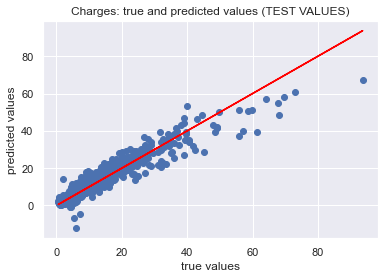

Mean absolute error of the prediction is: 1.734036529480379
Mean squared error of the prediction is: [262.04201805 111.97552772 397.426308   ... 112.62850773 136.83208483
 153.57131272]
Root mean squared error of the prediction is: [16.18771195 10.58184897 19.93555387 ... 10.6126579  11.69752473
 12.39238931]
Mean absolute percentage error of the prediction is: 8       NaN
12      NaN
14      NaN
15      NaN
17      NaN
         ..
5859    NaN
5864    NaN
5867    NaN
5870    NaN
Price   NaN
Length: 1176, dtype: float64


In [71]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

plt.scatter(y_test, y_ols_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values (TEST VALUES)")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_ols_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_ols_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_ols_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_ols_test) / y_test)) * 100))

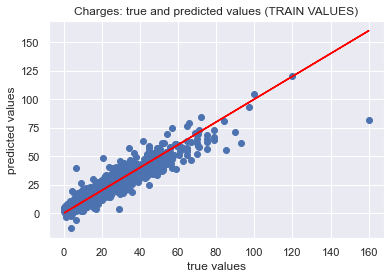

Mean absolute error of the prediction is: 1.7390266460905361
Mean squared error of the prediction is: [134.02412708 246.11266539 154.58383895 ... 154.50028495 134.78025331
 141.14071989]
Root mean squared error of the prediction is: [11.57687899 15.68797837 12.43317493 ... 12.42981436 11.6094898
 11.88026599]
Mean absolute percentage error of the prediction is: 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
5866    NaN
5868    NaN
5869    NaN
5871    NaN
Price   NaN
Length: 4698, dtype: float64


In [72]:
plt.scatter(y_train, y_ols_train)
plt.plot(y_train, y_train, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values (TRAIN VALUES)")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_train, y_ols_train)))
print("Mean squared error of the prediction is: {}".format(mse(y_train, y_ols_train)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_train, y_ols_train)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_train - y_ols_train) / y_train)) * 100))

# GridSearchCv Function

In [73]:
from sklearn.model_selection import GridSearchCV
def grid(model,X,y,param):
    grid_cv = GridSearchCV(estimator=model,param_grid = param,cv = 10,return_train_score=True,n_jobs = -1)
    grid_cv.fit(X, y)
    df = pd.DataFrame()
    df["params"] = grid_cv.cv_results_["params"]
    df["mean_test_score"] = grid_cv.cv_results_["mean_test_score"]
    df["mean_train_score"]= grid_cv.cv_results_["mean_train_score"]
    df["sub"] = pd.DataFrame(df.mean_train_score.to_numpy() - df.mean_test_score.to_numpy())
    return df.sort_values(by = "sub")

# K-Nearest Neighbour

In [74]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()

In [75]:
parameters = {"n_neighbors": [x for x in np.arange(0,20,1)]}
#13 0.742932	0.786744 - X_custom2_pf
# {'n_neighbors': 13}	0.742969	0.786730 -> X_custompf
# {'n_neighbors': 14}	0.538499	0.604930 -> X
# 17	{'n_neighbors': 17}	0.645539	0.693889 -> X_custom_pf

In [76]:
#dmmy = pd.DataFrame()
#dmmy = grid(knn,X,y_df,parameters)
#dmmy[:10]

In [77]:
#dmmy = pd.DataFrame()
#dmmy = grid(knn,X_pca,y_df,parameters)
#dmmy.head()

In [78]:
#dmmy = pd.DataFrame()
#dmmy = grid(knn,X_custom,y_df,parameters)
#dmmy.head()

In [79]:
#dmmy = pd.DataFrame()
#dmmy= grid(knn,X_pf_df,y_df,parameters)
#dmmy.head()

In [80]:
# KNN MODEL

In [157]:
knn = neighbors.KNeighborsRegressor(n_neighbors=19)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_df, test_size=0.2, random_state=42)

In [158]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8200888044503273

In [159]:
knn.score(X_train,y_train)

0.8278164431600723

In [84]:
knn_pred_y_test = knn.predict(X_test)
knn_pred_y_train = knn.predict(X_train)

In [85]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [86]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, knn_pred_y_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, knn_pred_y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, knn_pred_y_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - knn_pred_y_test) / y_test)) * 100))

Mean absolute error of the prediction is: 2.0925267637178053
Mean squared error of the prediction is: [18.87466046]
Root mean squared error of the prediction is: [4.34449772]
Mean absolute percentage error of the prediction is: Price    29.027363
dtype: float64


In [87]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_train, knn_pred_y_train)))
print("Mean squared error of the prediction is: {}".format(mse(y_train, knn_pred_y_train)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_train, knn_pred_y_train)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_train - knn_pred_y_train) / y_train)) * 100))

Mean absolute error of the prediction is: 2.0646471992201065
Mean squared error of the prediction is: [22.70962266]
Root mean squared error of the prediction is: [4.76546143]
Mean absolute percentage error of the prediction is: Price    23.450996
dtype: float64


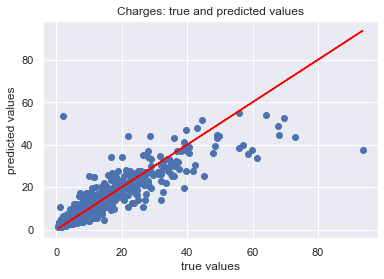

In [88]:
plt.scatter(y_test, knn_pred_y_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [90]:
dt_reg = DecisionTreeRegressor()

In [91]:
params = {"max_depth": range(3,5),"min_samples_split" : range(2,6), "min_samples_leaf" : range(1,3)}

In [92]:
dmmy1 = pd.DataFrame()
dmmy1 =  grid(dt_reg,X,y_df,params)
dmmy1.head()

,params,mean_test_score,mean_train_score,sub
0,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.732791,0.746335,0.013544
1,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.732791,0.746335,0.013544
3,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.732791,0.746335,0.013544
4,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.732791,0.746335,0.013544
5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.732791,0.746335,0.013544


In [93]:
# Decision Tree Model

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_df)

In [95]:
dt_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2,min_samples_split=2)

In [96]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)

In [97]:
dt_reg_test_pred = dt_reg.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, dt_reg_test_pred)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, dt_reg_test_pred)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, dt_reg_test_pred, squared=False)))

Mean absolute error of the prediction is: 3.4531559070014364
Mean squared error of the prediction is: 40.542032791829634
Root mean squared error of the prediction is: 6.367262582289946


# Random Forest

In [306]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
random_forest = RandomForestRegressor(random_state=42)

In [307]:
params = {"n_estimators": range(90,100,1), "max_depth" :range(1,6)}

In [308]:
# Creating Random Forest Model

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X_pf_df, y_df, test_size=0.23, random_state=42)

In [341]:
random_forest = RandomForestRegressor(random_state=42,max_depth= 3, n_estimators= 93)

In [342]:
random_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=93, random_state=42)

In [343]:
random_forest.score(X_test,y_test)

0.7686628522099684

In [344]:
random_forest.score(X_train,y_train)

0.816948896647886

In [345]:
rf_pred_ytest = random_forest.predict(X_test)
rf_pred_ytrain = random_forest.predict(X_train)

In [346]:
from sklearn.metrics import mean_squared_error
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, rf_pred_ytest)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, rf_pred_ytest)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, rf_pred_ytest, squared=False)))

Mean absolute error of the prediction is: 2.811647858725632
Mean squared error of the prediction is: 23.885096821715276
Root mean squared error of the prediction is: 4.8872381588904865


# SVM

In [107]:
from sklearn.svm import SVR

svr = SVR(kernel = "linear")

In [108]:
params = {"C":[10**x for x in range(-4,4)]}

In [109]:
#svr = SVR(kernel = "linear")
#svr.fit(X,y_df)

In [110]:
# Creating Model SVR

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y_df, test_size=0.2, random_state=42)

In [112]:
svr = SVR(C = 0.001, kernel =  "linear")

svr.fit(X_train,y_train)

In [113]:
#svr_y_pred = svr.predict(X_test)

# XGBoost

## 

In [162]:
import xgboost as xgb

In [163]:
model = xgb.XGBRegressor(objective="reg:squarederror",learning_rate= 0.1,gamma = 0.1,n_estimators = 22,max_depth = 3,min_child_weight=4,colsample_bytree= 0.6)

In [164]:
model.fit(X_pf_df,y_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=22, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X_pf_df,y_df)

In [166]:
print("model test score : {}\n model train score {}".format(model.score(X_test,y_test),model.score(X_train,y_train)))

model test score : 0.8527846841327564
 model train score 0.858397830879621


In [167]:
model.fit(X_custom_pf,y_df)
X_train,X_test,y_train,y_test = train_test_split(X_custom_pf,y_df)
print("model test score : {}\n model train score {}".format(model.score(X_test,y_test),model.score(X_train,y_train)))

model test score : 0.7331639182779184
 model train score 0.7184720359247294


In [168]:
model.fit(X_custompf,y_df)
X_train,X_test,y_train,y_test = train_test_split(X_custompf,y_df)
print("model test score : {}\n model train score {}".format(model.score(X_test,y_test),model.score(X_train,y_train)))

model test score : 0.7515872438585622
 model train score 0.7203084051201614


In [169]:
model.fit(X_custom2_pf,y_df)
X_train,X_test,y_train,y_test = train_test_split(X_custom2_pf,y_df)
print("model test score : {}\n model train score {}".format(model.score(X_test,y_test),model.score(X_train,y_train)))

model test score : 0.736023006212366
 model train score 0.7206128630501606


In [170]:
# XGB MODEL

In [349]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror",learning_rate= 0.1,gamma = 0.1,n_estimators = 22,max_depth = 3,min_child_weight=4,colsample_bytree= 0.6)

In [383]:
xgb_model.fit(X_pf_df,y_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=22, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [384]:
X_train,X_test,y_train,y_test = train_test_split(X_pf_df,y_df)

In [385]:
xgb_model.score(X_test,y_test)

0.8557605658507647

In [386]:
xgb_model.score(X_train,y_train)

0.8574905752448193

In [374]:
pred_y_test = xgb_model.predict(X_test)
pred_y_train = xgb_model.predict(X_train)

In [375]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, pred_y_test)))
print("Mean squared error of the prediction is: {}".format(mean_squared_error(y_test, pred_y_test)))
print("Root mean squared error of the prediction is: {}".format(mean_squared_error(y_test, pred_y_test, squared=False)))

Mean absolute error of the prediction is: 2.4021283493704626
Mean squared error of the prediction is: 26.68362084632457
Root mean squared error of the prediction is: 5.165619115490859


In [376]:
importance_level = pd.Series(data=model.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values(ascending = False)[:30]
plt.figure(figsize=(20,10))
importance_level_sorted.plot(kind='barh', color='darkred')
plt.title('Importance Level of the Features')
plt.show()

ValueError: Length of passed values is 1034, index implies 44.

In [377]:
import joblib

In [378]:
knn
joblib.dump(knn, "knn.joblib")

['knn.joblib']

In [131]:
dt_reg
joblib.dump(dt_reg, "dt_reg.joblib")

['dt_reg.joblib']

In [347]:
random_forest
joblib.dump(random_forest, "random_forest.joblib")

['random_forest.joblib']

In [387]:
xgb_model
joblib.dump(xgb_model, "xgb.joblib")

['xgb.joblib']